# Activation and Loss Function Exploration Exercise

## Background
This exercise aims to explore the effects of different activation and loss functions on a neural network's learning and performance. You will modify a simple neural network in TensorFlow to experiment with these functions.

## Activation Functions
Common activation functions include:

* Sigmoid
* ReLU (Rectified Linear Unit)
* Tanh (Hyperbolic Tangent)

## Loss Functions
Some standard loss functions are:

* Mean Squared Error (MSE) - typically used for regression tasks
* Binary Cross-Entropy - used for binary classification
* Categorical Cross-Entropy - used for multi-class classification

# Setup
First, let's import TensorFlow and other necessary libraries. Run the cell below to import them.


In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split


## Dataset Preparation
We'll use a synthetic dataset for binary classification. The 'make_moons' function from scikit-learn generates a two-moon dataset, which is ideal for this experiment.

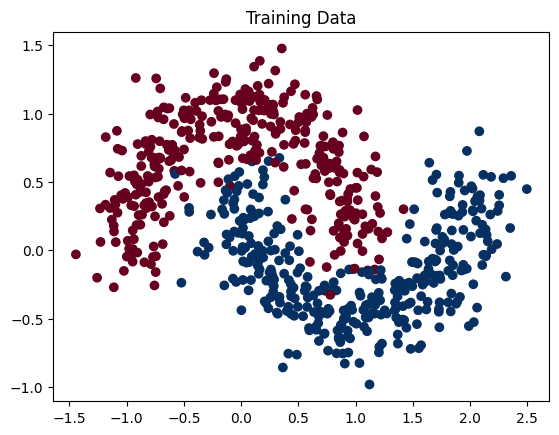

In [51]:
# Generate synthetic data
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu)
plt.title("Training Data")
plt.show()


## Model Building
Now, let's define a function to create a simple neural network model. You will modify this function later to experiment with different activation and loss functions.

In [52]:
def build_model(activation_function='relu', loss_function='binary_crossentropy'):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, activation=activation_function, input_shape=(2,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])
    return model


# Training and evaluating the model
Let's train the model and see how well it solves the problem.

In [53]:
# Function to train, evaluate, and visualize model predictions along with ground truth
def train_and_evaluate_model(model, epochs=100):
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0, validation_split=0.2)
    
    # Evaluating the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    # Plotting training history
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='Accuracy (training data)')
    plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
    plt.title('Training and Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Predicting on test data
    predictions = model.predict(X_test) > 0.5

    # Plotting model predictions
    plt.subplot(1, 3, 2)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions[:, 0], cmap=plt.cm.coolwarm)
    plt.title('Model Predictions on Test Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Plotting ground truth
    plt.subplot(1, 3, 3)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
    plt.title('Ground Truth for Test Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    plt.show()

    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

# Example of using the function with a specific activation and loss function
#model = build_model(activation_function='relu', loss_function='binary_crossentropy')
#train_and_evaluate_model(model, epochs=100)


## Activation Functions

10/10 [==============================] - 0s 2ms/step


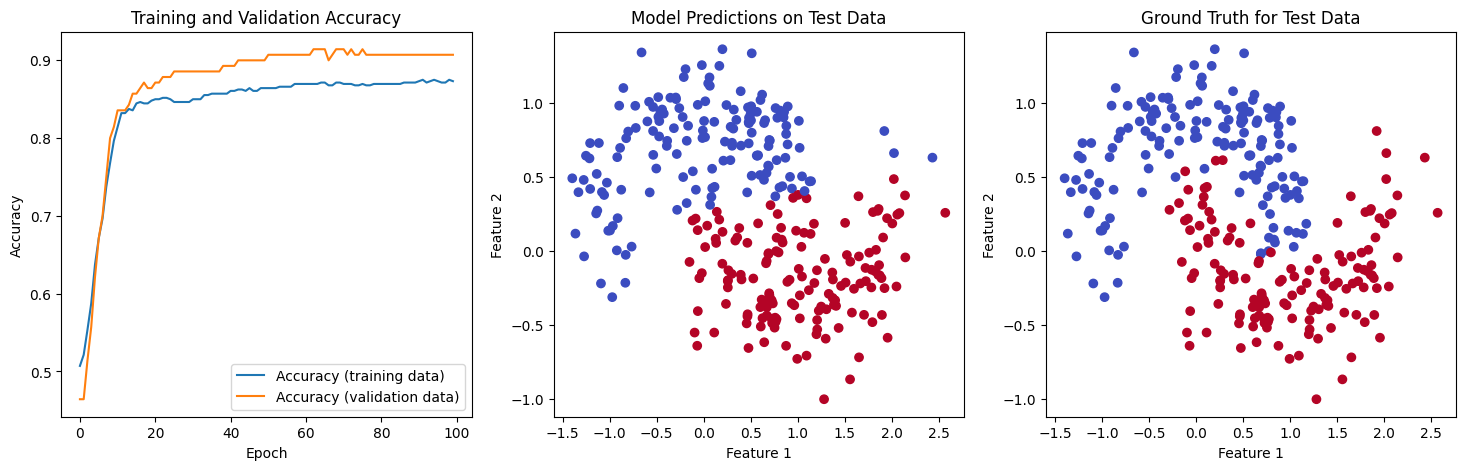

Test Loss: 0.2336
Test Accuracy: 0.9000


In [54]:
# ReLU Activation Function
model_relu = build_model(activation_function= 'relu', loss_function='binary_crossentropy')
train_and_evaluate_model(model_relu, epochs=100)

10/10 [==============================] - 0s 3ms/step


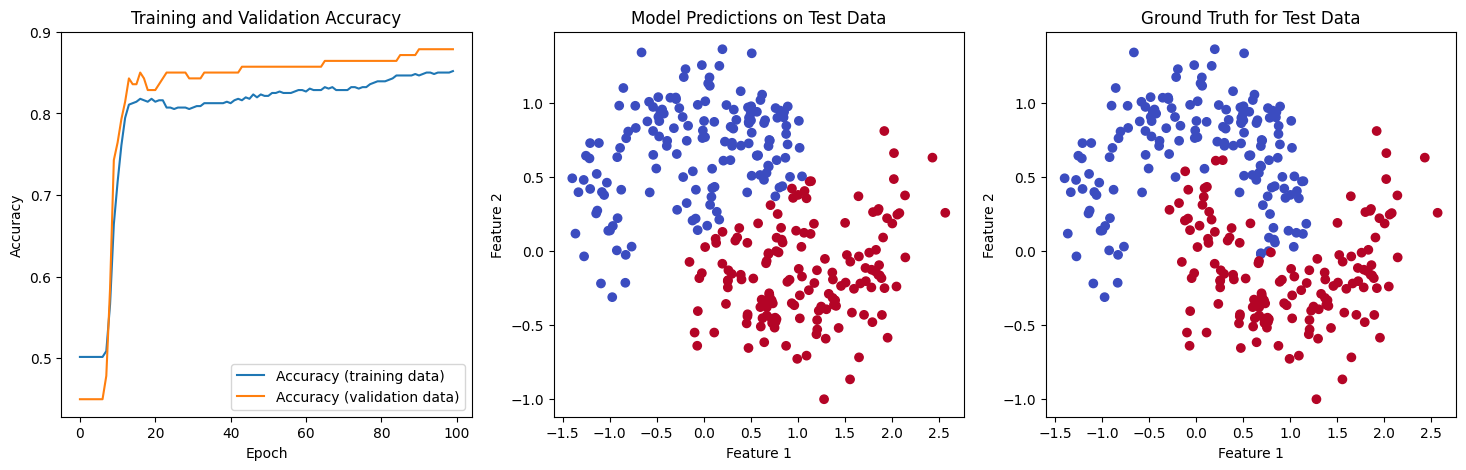

Test Loss: 0.2950
Test Accuracy: 0.8767


In [55]:
# Sigmoid Activation Function
model_sig = build_model(activation_function= 'sigmoid', loss_function='binary_crossentropy')
train_and_evaluate_model(model_sig, epochs=100)

10/10 [==============================] - 0s 3ms/step


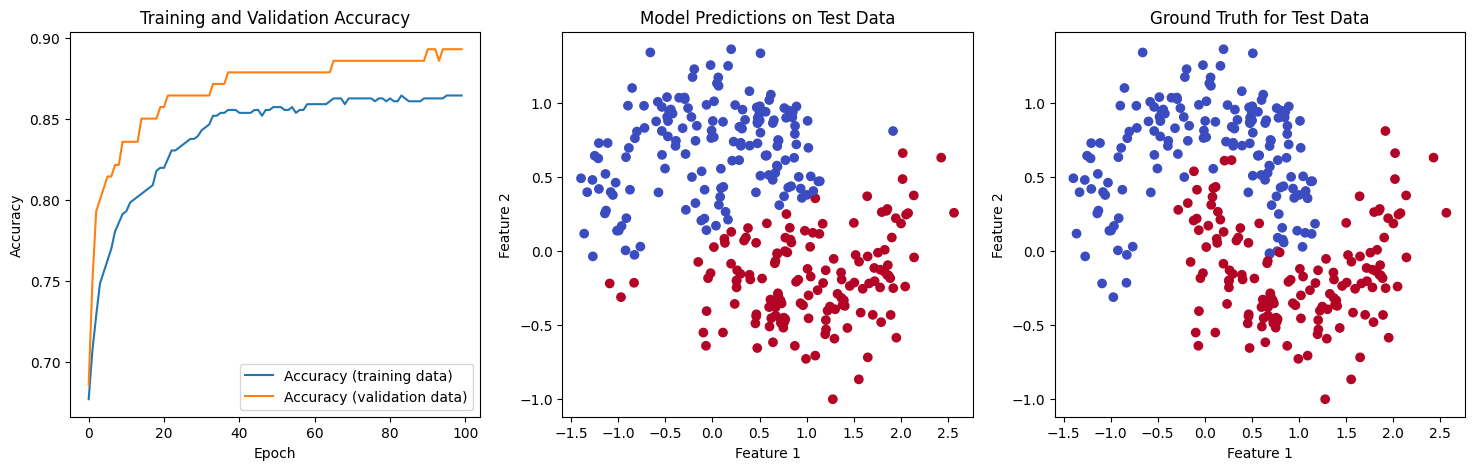

Test Loss: 0.2567
Test Accuracy: 0.8867


In [56]:
# Tanh Activation Function

model_tan = build_model(activation_function= 'tanh', loss_function='binary_crossentropy')
train_and_evaluate_model(model_tan, epochs=100)

## Loss Functions

10/10 [==============================] - 0s 5ms/step


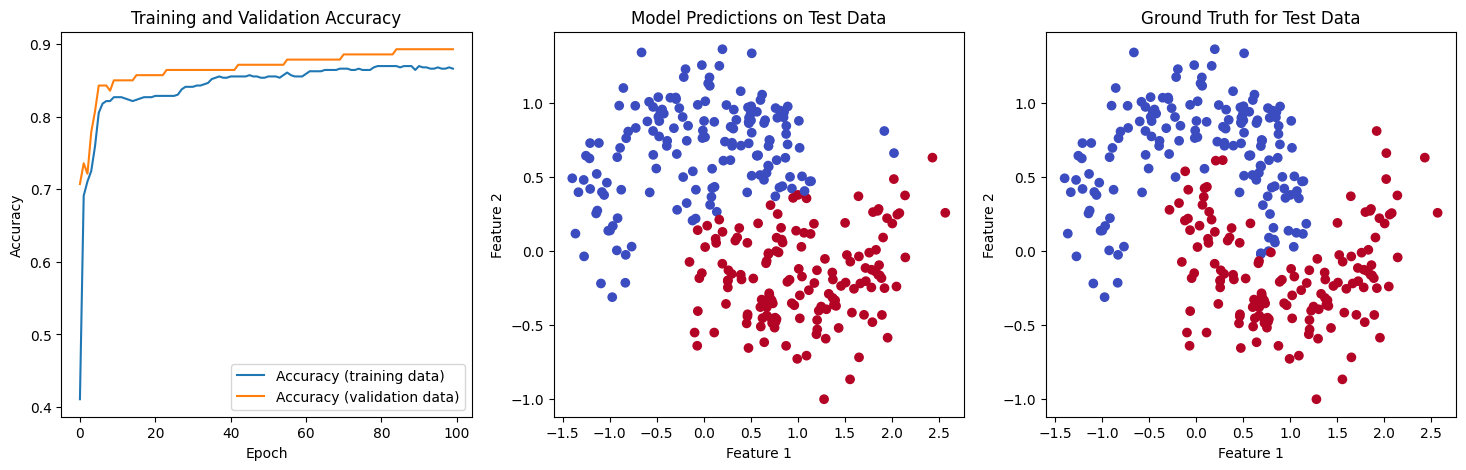

Test Loss: 0.2472
Test Accuracy: 0.8933


In [57]:

model_binary = build_model(activation_function='relu', loss_function='binary_crossentropy')
train_and_evaluate_model(model_binary, epochs=100)

10/10 [==============================] - 0s 3ms/step


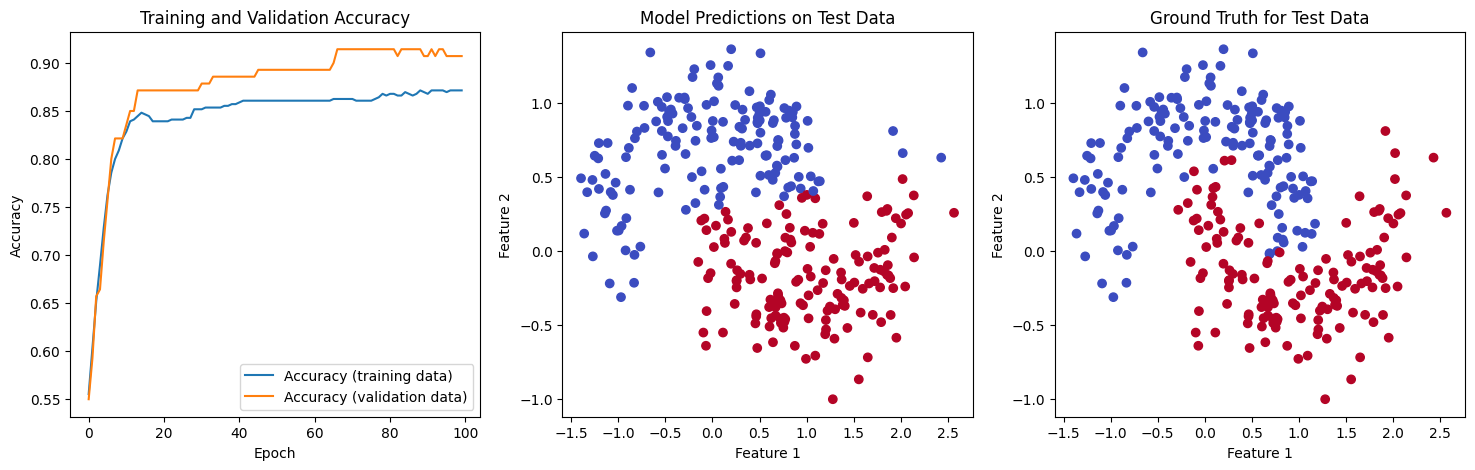

Test Loss: 0.0747
Test Accuracy: 0.9000


In [58]:

model_mean = build_model(activation_function='relu', loss_function='mean_squared_error')
train_and_evaluate_model(model_mean, epochs=100)

10/10 [==============================] - 0s 2ms/step


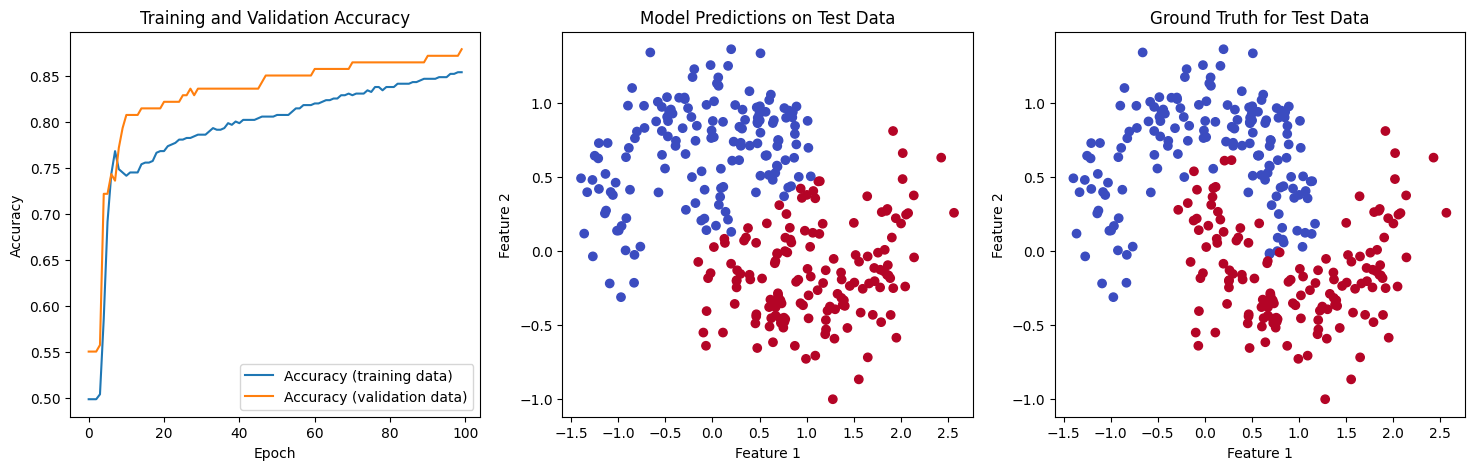

Test Loss: 0.0942
Test Accuracy: 0.8733


In [59]:

model_sig_mean = build_model(activation_function='sigmoid', loss_function='mean_squared_error')
train_and_evaluate_model(model_sig_mean, epochs=100)

10/10 [==============================] - 0s 4ms/step


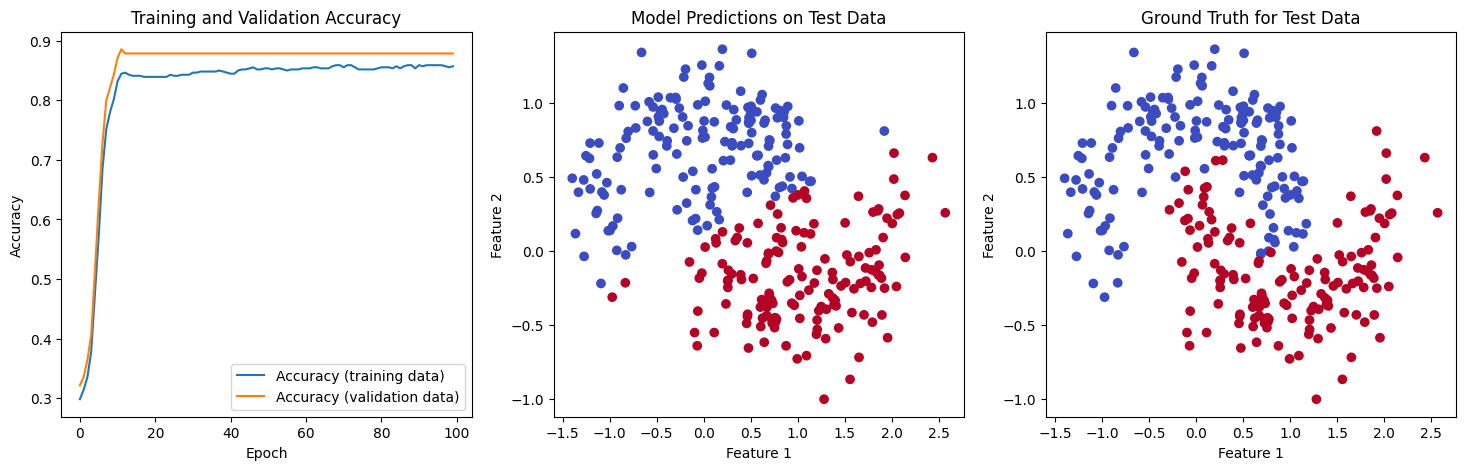

Test Loss: 0.0851
Test Accuracy: 0.8767


In [60]:

model_tan_mean = build_model(activation_function='tanh', loss_function='mean_squared_error')
train_and_evaluate_model(model_tan_mean, epochs=100)

# Experimentation
## Task 1: Activation Functions
1. Experiment with different activation functions in the hidden layer. Replace activation_function in build_model with 'sigmoid', 'relu', and 'tanh'.
2. Train the model for each activation function and evaluate its performance on the test set.
3. Record your observations.
## Task 2: Loss Functions
1. Now, experiment with different loss functions. For binary classification, try 'binary_crossentropy' and 'mean_squared_error'.
2. Train and evaluate the model for each loss function.
3. Record your observations.

# Analysis and Questions
After completing the tasks, answer the following questions:

1. How did different activation functions affect the model's performance?

   - Relu: 
     It helped the model learn well, and the test accuracy was high at 91%. ReLU is like a helpful tool that's often great for making models learn faster and better.

   - Sigmoid: 
     The model didn't do as well. Test accuracy was 87.33%, which means it struggled a bit to learn the task. Sigmoid is a bit slower to teach models compared to ReLU.

   - Tanh:
     The model did reasonably well with an accuracy of 88%, but it's not as effective as ReLU. Tanh is a bit like sigmoid, and it worked fine but not as great for this specific model.
  
    ReLU worked the best for this task, making the model learn quickly and accurately. 


2. How did different loss functions impact the learning process and accuracy?

   - binary_crossentropy: Provides a good balance between accuracy and convergence speed.
    
   - mean_squared_error : Measures the average squared difference between predicted and true values.Lower loss and slightly higher accuracy compared to Binary Crossentropy and sensitive to outliers.
    
3. Which combination of activation and loss function provided the best results for this task?

  The combination of Relu activation and Mean square error function provided the best results fot this task.

# Conclusion
- Summarize your findings and discuss why certain combinations might work better than others for this specific problem.

The optimal combination of ReLU activation and Mean Squared Error loss function proved to be the most effective for the given task. This suggests that the choice of activation and loss functions is problem-dependent, and in this case, ReLU's ability to promote rapid learning, coupled with mean squared error's precision-oriented nature, led to the best results.